In [80]:
import numpy as np
import pandas as pd
from scipy.stats import norm,probplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [97]:
ted = pd.read_csv("TedWilliams.csv")
ken = pd.read_csv("Griffey.csv")
rog = pd.read_csv("RogersHornsby.csv")

In [94]:
ted

,Year,Age,G,PA,AB,R,H,2B,3B,HR,...,OPS+,TB,GDP,HBP,IBB,RAR,WAR,Awards,Unnamed: 27,Unnamed: 28
0,1939,20.0,149,677,565,131,185,44,11,31,...,160,344,10,2,NaN,74,6.80,MVP-4,NaN,NaN
1,1940,21.0,144,661,561,134,193,43,14,23,...,162,333,13,3,NaN,70,6.50,ASMVP-14,NaN,NaN
2,1941,22.0,143,606,456,135,185,33,3,37,...,235,335,10,3,25.0,110,10.40,ASMVP-2,NaN,NaN
3,1942,23.0,150,671,522,141,186,34,5,36,...,216,338,12,4,20.0,102,10.40,ASMVP-2,NaN,NaN
4,1946,27.0,150,672,514,142,176,37,8,38,...,215,343,12,2,29.0,101,10.60,ASMVP-1,NaN,NaN
5,1947,28.0,156,693,528,125,181,40,9,32,...,205,335,10,2,29.0,91,9.50,ASMVP-2,NaN,NaN
6,1948,29.0,137,638,509,124,188,44,3,25,...,189,313,10,3,14.0,86,8.30,ASMVP-3,NaN,NaN
7,1949,30.0,155,730,566,150,194,39,3,43,...,191,368,22,2,11.0,94,9.10,ASMVP-1,NaN,NaN
8,1950,31.0,89,416,334,82,106,24,1,28,...,168,216,12,0,2.0,41,3.90,ASMVP-21,NaN,NaN
9,1951,32.0,148,675,531,109,169,28,4,30,...,164,295,10,0,9.0,73,7.10,ASMVP-13,NaN,NaN


In [95]:
ken

,Year,Age,G,PA,AB,R,H,2B,3B,HR,...,SLG,OPS,OPS+,TB,GDP,HBP,IBB,RAR,WAR,Awards
0,1989,19.0,127,506,455,61,120,23,0,16,...,0.420,0.748,108,191,4,2,8,32,3.3,RoY-3
1,1990,20.0,155,666,597,91,179,28,7,22,...,0.481,0.847,136,287,12,2,12,52,5.2,ASMVP-19GG
2,1991,21.0,154,633,548,76,179,42,1,22,...,0.527,0.926,155,289,10,1,21,70,7.1,ASMVP-9GGSS
3,1992,22.0,142,617,565,83,174,39,4,27,...,0.535,0.896,149,302,15,5,15,57,5.8,ASMVP-17GG
4,1993,23.0,156,691,582,113,180,38,3,45,...,0.617,1.025,171,359,14,6,25,91,8.8,ASMVP-5GGSS
5,1994,24.0,111,493,433,94,140,24,4,40,...,0.674,1.076,171,292,9,2,19,76,6.9,ASMVP-2GGSS
6,1995,25.0,72,314,260,52,67,7,0,17,...,0.481,0.860,122,125,4,0,6,34,3.3,ASGG
7,1996,26.0,140,638,545,125,165,26,2,49,...,0.628,1.020,154,342,7,7,13,104,9.7,ASMVP-4GGSS
8,1997,27.0,157,704,608,125,185,34,3,56,...,0.646,1.028,165,393,12,8,23,95,9.1,ASMVP-1GGSS
9,1998,28.0,161,720,633,120,180,33,3,56,...,0.611,0.977,150,387,14,7,11,70,6.6,ASMVP-4GGSS


In [98]:
rog

,Year,Age,G,PA,AB,R,H,2B,3B,HR,...,SLG,OPS,OPS+,TB,HBP,RAR,WAR,Unnamed: 24,Pos,Awards
0,1915,19.0,18,61,57,5,14,2,0,0,...,0.281,0.552,66,16,0,-3,-0.4,NaN,6,NaN
1,1916,20.0,139,550,495,63,155,17,15,6,...,0.444,0.814,151,220,4,42,4.9,NaN,563/H4,NaN
2,1917,21.0,145,589,523,86,171,24,17,8,...,0.484,0.868,169,253,4,85,9.9,NaN,*6/H,NaN
3,1918,22.0,115,466,416,51,117,19,11,5,...,0.416,0.764,137,173,3,48,5.4,NaN,*6/H98,NaN
4,1919,23.0,138,577,512,68,163,15,9,8,...,0.430,0.814,150,220,7,59,6.7,NaN,564/3,NaN
5,1920,24.0,149,660,589,96,218,44,20,9,...,0.559,0.990,185,329,3,88,9.6,NaN,*4,NaN
6,1921,25.0,154,674,592,131,235,44,18,21,...,0.639,1.097,191,378,7,109,10.8,NaN,*4/7563,NaN
7,1922,26.0,154,704,623,141,250,46,14,42,...,0.722,1.181,207,450,1,108,10.0,NaN,*4,NaN
8,1923,27.0,107,487,424,89,163,32,10,17,...,0.627,1.086,188,266,3,70,6.7,NaN,43/H,NaN
9,1924,28.0,143,642,536,121,227,43,14,25,...,0.696,1.203,222,373,2,125,12.2,NaN,*4,MVP-2


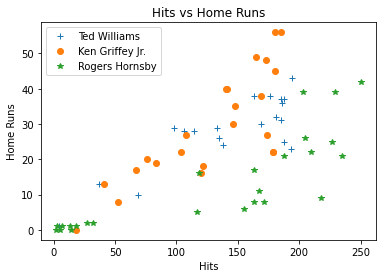

In [112]:
plt.plot(ted["H"], ted["HR"], "+", label = "Ted Williams")
plt.plot(ken["H"], ken["HR"], "o", label = "Ken Griffey Jr.")
plt.plot(rog["H"], rog["HR"], "*", label = "Rogers Hornsby")
plt.xlabel("Hits")
plt.ylabel("Home Runs")
plt.title("Hits vs Home Runs")
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8dc0a2adf0>,
      dtype=object)

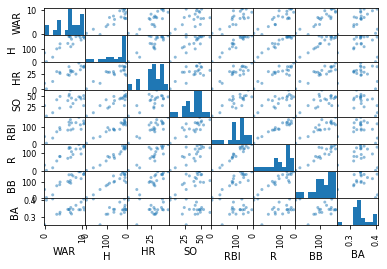

In [120]:
pd.plotting.scatter_matrix(ted[["WAR", "H", "HR", "SO", "RBI", "R", "BB", "BA"]])